<a href="https://colab.research.google.com/github/feandrad/fiap-insurance/blob/main/FIAP_POS_Trabalho_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# --- 1. CRIAR O DATAFRAME DIRETO (sem MySQL) ---

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm

# Dados copiados do .docx
pacientes = [
    (56, 'feminino', 29.774373714007336, 2, True, 'sudoeste', 31109.88976),
    (43, 'masculino', 27.153334218712345, 0, False, 'sudeste', 12845.65000),
    (35, 'feminino', 22.540010999900123, 3, True, 'nordeste', 45000.23000),
    (29, 'masculino', 31.09900030012, 1, True, 'centro-oeste', 21230.44000),
    (62, 'feminino', 24.854878787878788, 0, False, 'norte', 8750.00000),
    (48, 'masculino', 26.4011002299, 2, True, 'sudeste', 17456.90000),
    (51, 'feminino', 33.020012347899, 4, True, 'sul', 29567.30000),
    (37, 'masculino', 28.9023456712345, 0, False, 'nordeste', 9985.66000),
    (25, 'feminino', 21.609999999999999, 1, False, 'sudoeste', 6500.00000),
    (39, 'masculino', 27.501239948377, 3, True, 'centro-oeste', 19300.75000),
    (45, 'feminino', 30.0, 2, True, 'sul', 24890.99000),
    (60, 'masculino', 32.45111111111111, 1, False, 'sudeste', 11200.10000),
    (33, 'feminino', 29.110000876000123, 0, False, 'norte', 7800.55000),
    (41, 'masculino', 25.67, 2, True, 'nordeste', 17200.34000),
    (52, 'feminino', 23.454545454545455, 3, True, 'sudoeste', 33000.67000),
    (38, 'masculino', 28.73, 1, False, 'sul', 9023.21000),
    (30, 'feminino', 27.890000999111999, 0, False, 'sudeste', 10900.00000),
    (44, 'masculino', 26.15, 2, True, 'centro-oeste', 19800.60000),
    (36, 'feminino', 24.75, 1, False, 'norte', 8700.99000),
    (27, 'masculino', 22.34, 0, False, 'sudoeste', 6500.33000),
    (55, 'feminino', 31.77, 2, True, 'nordeste', 27890.75000),
    (42, 'masculino', 30.121212121212121, 3, True, 'sul', 21900.88000),
    (46, 'feminino', 26.0, 1, False, 'sudeste', 14456.22000),
    (58, 'masculino', 33.8, 0, True, 'norte', 32500.11000),
    (31, 'feminino', 25.432100980000001, 2, True, 'sudoeste', 15500.00000),
    (40, 'masculino', 29.764646464646465, 0, False, 'nordeste', 11800.00000),
    (50, 'feminino', 28.55111111111111, 3, True, 'centro-oeste', 26500.89000),
    (32, 'masculino', 23.44, 1, False, 'sul', 8700.60000),
    (47, 'feminino', 27.8, 2, True, 'sudoeste', 19000.45000),
    (34, 'masculino', 30.99, 1, True, 'norte', 21200.00000),
    (28, 'feminino', 24.56, 0, False, 'sudeste', 9800.00000),
    (59, 'masculino', 26.789123456789123, 3, True, 'nordeste', 31000.50000),
    (53, 'feminino', 33.333333333333336, 4, True, 'sudoeste', 34100.75000),
    (26, 'masculino', 20.45, 0, False, 'sul', 7800.00000),
    (63, 'feminino', 32.1, 2, True, 'centro-oeste', 30000.80000),
    (49, 'masculino', 25.99, 1, False, 'norte', 8800.33000),
    (54, 'feminino', 31.22, 3, True, 'sudoeste', 26700.50000),
    (57, 'masculino', 29.01, 2, True, 'sul', 29890.00000),
    (61, 'feminino', 27.76, 0, False, 'nordeste', 11600.70000),
    (24, 'masculino', 22.99, 1, False, 'sudeste', 7200.88000),
    (43, 'feminino', 30.15, 2, True, 'sudoeste', 23200.00000),
    (39, 'masculino', 28.12, 0, True, 'norte', 18000.00000),
    (35, 'feminino', 26.9, 3, False, 'sul', 13700.00000),
    (29, 'masculino', 31.333333333333332, 1, True, 'nordeste', 24700.65000),
    (37, 'feminino', 25.67, 2, True, 'sudoeste', 20100.45000),
    (50, 'masculino', 24.45, 0, False, 'sudeste', 9400.00000),
    (28, 'feminino', 23.99, 1, False, 'centro-oeste', 9100.00000),
    (46, 'masculino', 29.87, 2, True, 'sudoeste', 24300.77000),
    (36, 'feminino', 30.67, 1, True, 'norte', 22500.88000),
    (60, 'masculino', 27.23, 3, False, 'nordeste', 19800.00000),
    (33, 'feminino', 26.88, 0, False, 'sul', 9900.00000)
]

# Criar DataFrame
df = pd.DataFrame(pacientes, columns=['idade', 'genero', 'imc', 'filhos', 'fumante', 'regiao', 'encargos'])

print("DataFrame criado com sucesso!")
df.head()


DataFrame criado com sucesso!


,idade,genero,imc,filhos,fumante,regiao,encargos
0,56,feminino,29.774374,2,True,sudoeste,31109.88976
1,43,masculino,27.153334,0,False,sudeste,12845.65000
2,35,feminino,22.540011,3,True,nordeste,45000.23000
3,29,masculino,31.099000,1,True,centro-oeste,21230.44000
4,62,feminino,24.854879,0,False,norte,8750.00000


Informações Gerais do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   idade         51 non-null     int64  
 1   genero        51 non-null     int64  
 2   imc           51 non-null     float64
 3   filhos        51 non-null     int64  
 4   fumante       51 non-null     bool   
 5   regiao        51 non-null     int64  
 6   encargos      51 non-null     float64
 7   genero_label  51 non-null     int64  
 8   regiao_label  51 non-null     int64  
dtypes: bool(1), float64(2), int64(6)
memory usage: 3.4 KB
None


Estatísticas Descritivas:
           idade     genero        imc     filhos     regiao      encargos  \
count  51.000000  51.000000  51.000000  51.000000  51.000000     51.000000   
mean   42.666667   0.490196  27.657585   1.450980   2.705882  18466.896270   
std    11.284798   0.504878   3.256896   1.188507   1.676832   922

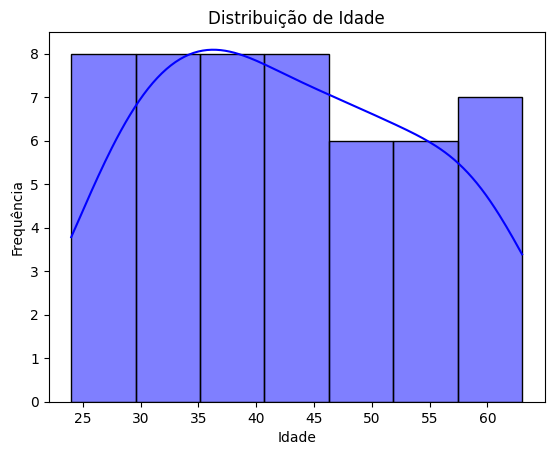

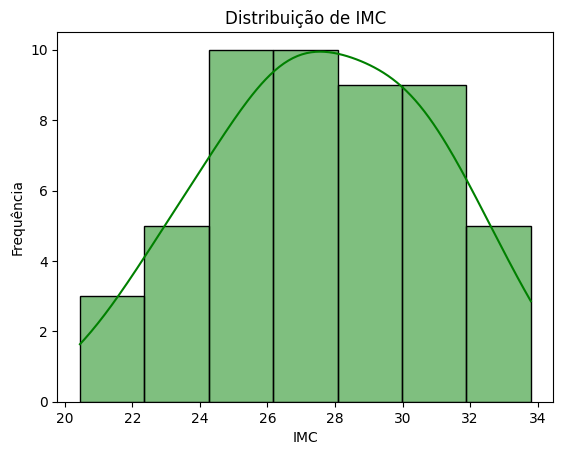

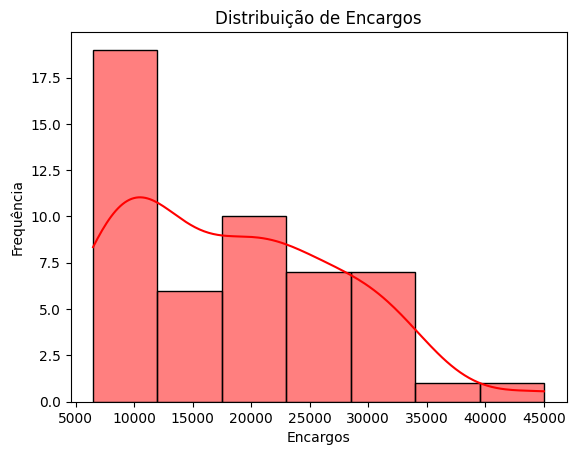

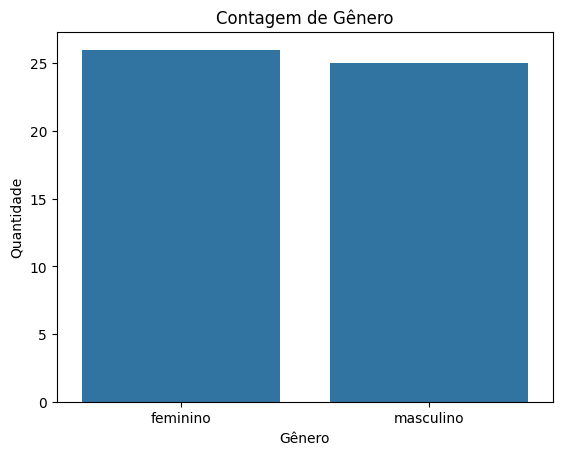

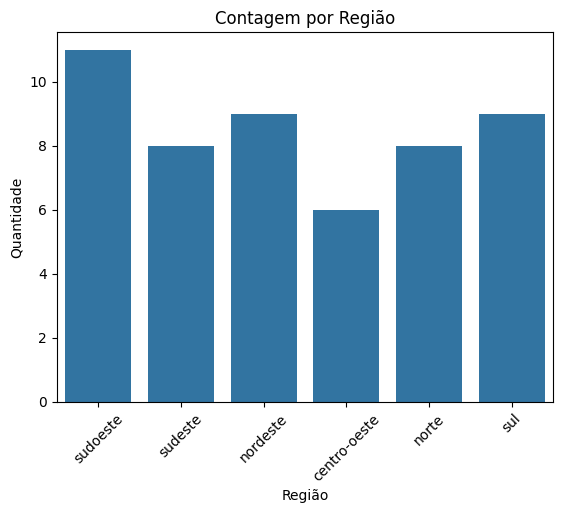

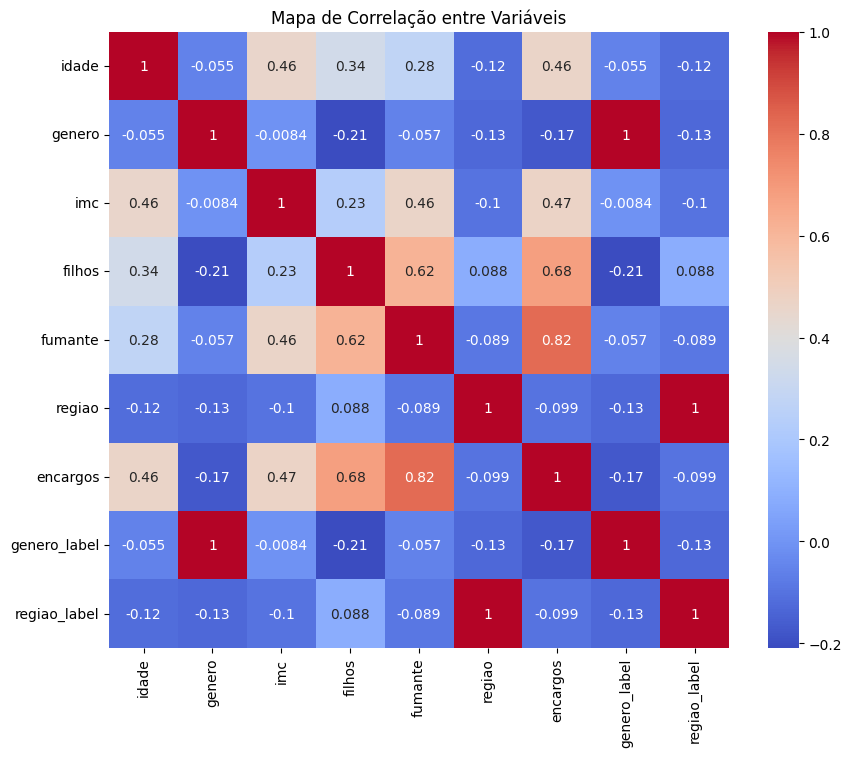

In [ ]:
# -----------------------
# EXPLORAÇÃO INICIAL
# -----------------------

print("Informações Gerais do DataFrame:")
print(df.info())
print("\n")

print("Estatísticas Descritivas:")
print(df.describe())
print("\n")

print("Valores Únicos por Coluna:")
for coluna in df.columns:
    print(f"{coluna}: {df[coluna].nunique()} valores únicos")
print("\n")

print("Valores Nulos:")
print(df.isnull().sum())
print("\n")

# -----------------------
# TRANSFORMAR CATEGÓRICOS EM NÚMEROS
# -----------------------

from sklearn.preprocessing import LabelEncoder

mapeamentos = {}

for coluna in ['genero', 'regiao']:
    le = LabelEncoder()
    df[coluna] = le.fit_transform(df[coluna])
    mapeamentos[coluna] = dict(zip(le.transform(le.classes_), le.classes_))

print("Mapeamentos aplicados:")
print(mapeamentos)
print("\n")

# -----------------------
# CRIAR COLUNAS AUXILIARES PARA GRÁFICOS
# -----------------------

df['genero_label'] = df['genero'].map(mapeamentos['genero'])
df['regiao_label'] = df['regiao'].map(mapeamentos['regiao'])

# -----------------------
# GRÁFICOS EXPLORATÓRIOS
# -----------------------

import matplotlib.pyplot as plt
import seaborn as sns

# Histograma da Idade
sns.histplot(df['idade'], kde=True, color='blue')
plt.title('Distribuição de Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

# Histograma do IMC
sns.histplot(df['imc'], kde=True, color='green')
plt.title('Distribuição de IMC')
plt.xlabel('IMC')
plt.ylabel('Frequência')
plt.show()

# Histograma dos Encargos
sns.histplot(df['encargos'], kde=True, color='red')
plt.title('Distribuição de Encargos')
plt.xlabel('Encargos')
plt.ylabel('Frequência')
plt.show()

# Mapear manualmente para gráficos, SEM alterar o DataFrame principal

# Gênero
genero_labels = {0: 'feminino', 1: 'masculino'}
df_plot_genero = df.copy()
df_plot_genero['genero'] = df_plot_genero['genero'].replace(genero_labels)

ax = sns.countplot(x='genero', data=df_plot_genero)
plt.title('Contagem de Gênero')
plt.xlabel('Gênero')
plt.ylabel('Quantidade')
plt.show()

# Região
regiao_labels = {
    0: 'centro-oeste',
    1: 'nordeste',
    2: 'norte',
    3: 'sudeste',
    4: 'sudoeste',
    5: 'sul'
}
df_plot_regiao = df.copy()
df_plot_regiao['regiao'] = df_plot_regiao['regiao'].replace(regiao_labels)

ax = sns.countplot(x='regiao', data=df_plot_regiao)
plt.title('Contagem por Região')
plt.xlabel('Região')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.show()


# -----------------------
# MAPA DE CORRELAÇÃO
# -----------------------

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Correlação entre Variáveis')
plt.show()


In [ ]:
# -----------------------
# PRÉ-PROCESSAMENTO PARA MACHINE LEARNING
# -----------------------

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# 1. VERIFICAR QUANTIDADE DE NULOS ANTES

print("Valores nulos antes da imputação:")
print(df.isnull().sum())
print("\n")

# Salvar a quantidade de nulos por coluna
nulos_antes = df.isnull().sum()

# 2. IMPUTAR VALORES NULOS (SOMENTE NUMÉRICOS)

num_cols = ['idade', 'imc', 'filhos', 'encargos']
imputer = SimpleImputer(strategy='mean')
df[num_cols] = imputer.fit_transform(df[num_cols])

# 3. VERIFICAR QUANTIDADE DE NULOS DEPOIS

nulos_depois = df.isnull().sum()

print("Valores nulos depois da imputação:")
print(nulos_depois)
print("\n")

# Calcular quantos valores foram corrigidos por coluna
nulos_corrigidos_por_coluna = nulos_antes - nulos_depois

print("Quantidade de valores nulos corrigidos por coluna:")
print(nulos_corrigidos_por_coluna)
print("\n")

# Calcular o total geral de valores corrigidos
total_nulos_corrigidos = nulos_corrigidos_por_coluna.sum()
print(f"Total geral de valores nulos corrigidos: {total_nulos_corrigidos}")
print("\n")


# 4. DEFINIR VARIÁVEIS INDEPENDENTES (X) E DEPENDENTE (y)

X = df[['idade', 'imc', 'filhos', 'fumante', 'genero', 'regiao']]
y = df['encargos']

# 5. DIVIDIR EM TREINAMENTO E TESTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Pré-processamento concluído!")
print(f"Tamanho do conjunto de treino: {X_train.shape}")
print(f"Tamanho do conjunto de teste: {X_test.shape}")


Valores nulos antes da imputação:
idade           0
genero          0
imc             0
filhos          0
fumante         0
regiao          0
encargos        0
genero_label    0
regiao_label    0
dtype: int64


Valores nulos depois da imputação:
idade           0
genero          0
imc             0
filhos          0
fumante         0
regiao          0
encargos        0
genero_label    0
regiao_label    0
dtype: int64


Quantidade de valores nulos corrigidos por coluna:
idade           0
genero          0
imc             0
filhos          0
fumante         0
regiao          0
encargos        0
genero_label    0
regiao_label    0
dtype: int64


Total geral de valores nulos corrigidos: 0


Pré-processamento concluído!
Tamanho do conjunto de treino: (40, 6)
Tamanho do conjunto de teste: (11, 6)


In [ ]:
# -----------------------
# PASSO 4: SEPARAR BASE EM TREINO E TESTE
# -----------------------

from sklearn.model_selection import train_test_split

# Definir as variáveis de entrada (X) e de saída (y)
X = df[['idade', 'imc', 'filhos', 'fumante', 'genero', 'regiao']]
y = df['encargos']

# Separar os dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# Mostrar resultados da separação
print(f"Tamanho do conjunto de treino: {X_train.shape}")
print(f"Tamanho do conjunto de teste: {X_test.shape}")

# -----------------------
# PASSO 5: TREINAMENTO E AVALIAÇÃO DO MODELO
# -----------------------

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Criar o modelo de Regressão Linear
modelo = LinearRegression()

# Treinar o modelo com os dados de treino
modelo.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = modelo.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print(f"\nErro Quadrático Médio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.2f}")


Tamanho do conjunto de treino: (40, 6)
Tamanho do conjunto de teste: (11, 6)

Erro Quadrático Médio (MSE): 20391082.82
Coeficiente de Determinação (R²): 0.70


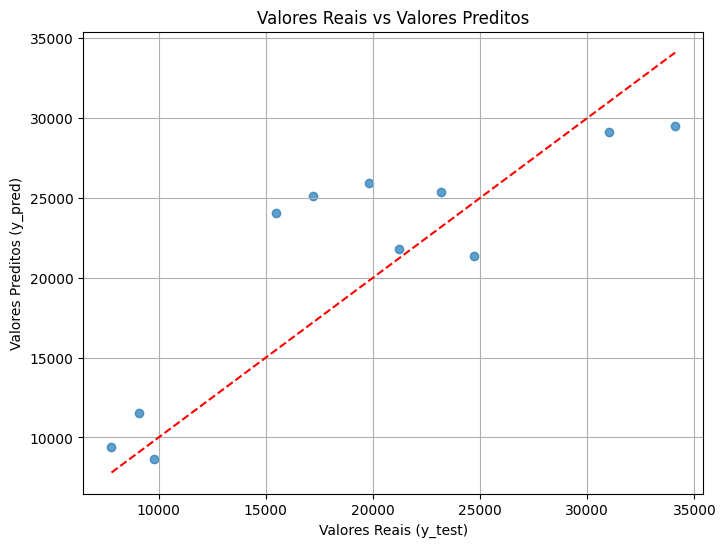

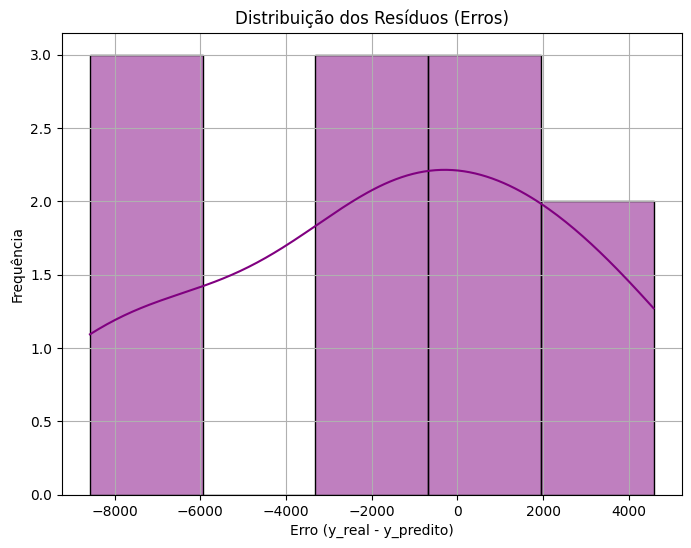

In [ ]:
# -----------------------
# PASSO 6: GRÁFICOS DE AVALIAÇÃO
# -----------------------

import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Gráfico Real vs Predito
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Valores Reais (y_test)')
plt.ylabel('Valores Preditos (y_pred)')
plt.title('Valores Reais vs Valores Preditos')
plt.grid(True)
plt.show()

# 2️⃣ Gráfico da Distribuição dos Resíduos
residuos = y_test - y_pred

plt.figure(figsize=(8,6))
sns.histplot(residuos, kde=True, color='purple')
plt.title('Distribuição dos Resíduos (Erros)')
plt.xlabel('Erro (y_real - y_predito)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()


Modelo com tratamento de outliars

In [ ]:
# -----------------------
# PARTE 1: GRÁFICO COM DADOS ORIGINAIS (JÁ PRONTO)
# -----------------------

# -----------------------
# PARTE 2: DETECTAR E REMOVER OUTLIERS (IQR)
# -----------------------

# Calcular o IQR dos encargos
Q1 = df['encargos'].quantile(0.25)
Q3 = df['encargos'].quantile(0.75)
IQR = Q3 - Q1

# Definir os limites inferior e superior
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Remover outliers
df_sem_outliers = df[(df['encargos'] >= limite_inferior) & (df['encargos'] <= limite_superior)]

print(f"Tamanho original: {df.shape}")
print(f"Tamanho sem outliers: {df_sem_outliers.shape}")

# -----------------------
# PARTE 3: REFAZER TREINO/TESTE COM BASE SEM OUTLIERS
# -----------------------

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Separar variáveis
X = df_sem_outliers[['idade', 'imc', 'filhos', 'fumante', 'genero', 'regiao']]
y = df_sem_outliers['encargos']

# Dividir em treino e teste
X_train_sem_out, X_test_sem_out, y_train_sem_out, y_test_sem_out = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------
# PARTE 4: TREINAR NOVO MODELO
# -----------------------

# Criar e treinar o modelo
modelo_sem_outliers = LinearRegression()
modelo_sem_outliers.fit(X_train_sem_out, y_train_sem_out)

# Fazer novas previsões
y_pred_sem_out = modelo_sem_outliers.predict(X_test_sem_out)

# Avaliar o modelo
mse_sem_out = mean_squared_error(y_test_sem_out, y_pred_sem_out)
r2_sem_out = r2_score(y_test_sem_out, y_pred_sem_out)

print(f"\nMSE sem outliers: {mse_sem_out:.2f}")
print(f"R² sem outliers: {r2_sem_out:.2f}")


Tamanho original: (51, 9)
Tamanho sem outliers: (51, 9)

MSE sem outliers: 20391082.82
R² sem outliers: 0.70


Comparando os dois modelos

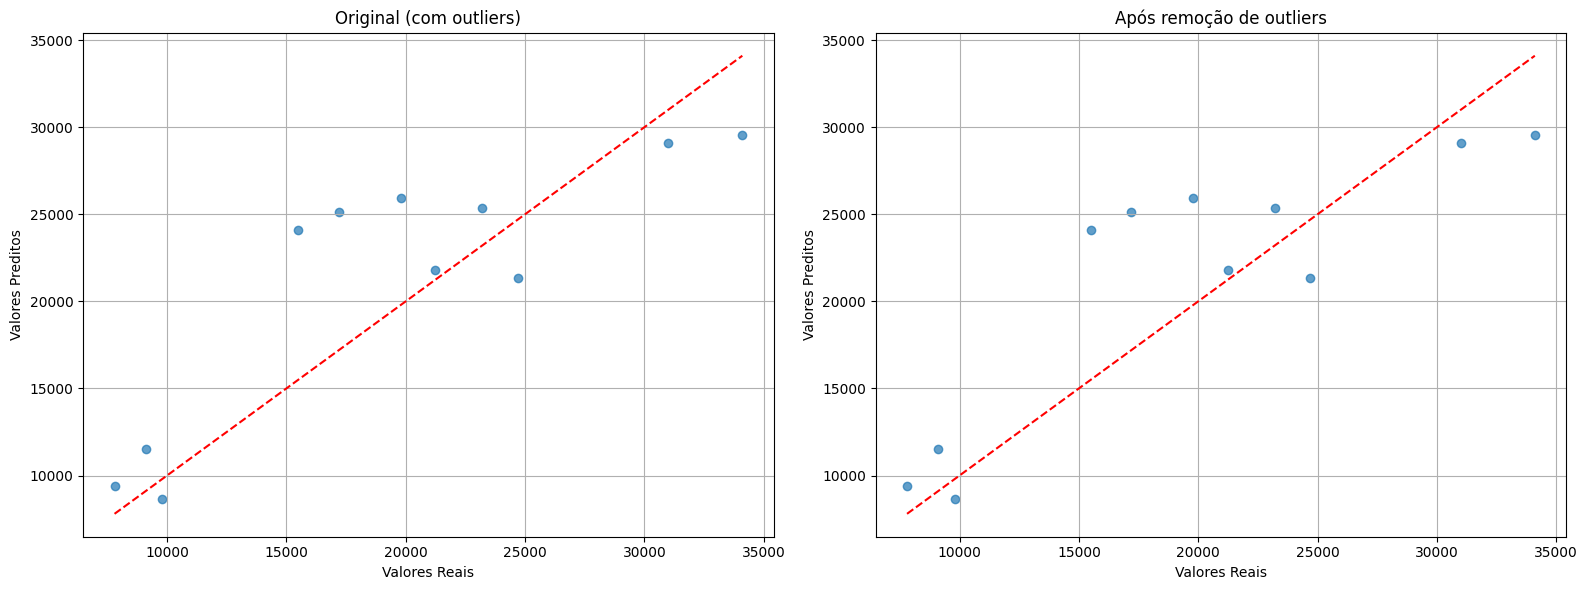

In [ ]:
import matplotlib.pyplot as plt

# Comparação de gráficos Real vs Predito

fig, axes = plt.subplots(1, 2, figsize=(16,6))

# Gráfico 1: Modelo Original
axes[0].scatter(y_test, y_pred, alpha=0.7)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
axes[0].set_title('Original (com outliers)')
axes[0].set_xlabel('Valores Reais')
axes[0].set_ylabel('Valores Preditos')
axes[0].grid(True)

# Gráfico 2: Modelo Sem Outliers
axes[1].scatter(y_test_sem_out, y_pred_sem_out, alpha=0.7)
axes[1].plot([y_test_sem_out.min(), y_test_sem_out.max()], [y_test_sem_out.min(), y_test_sem_out.max()], color='red', linestyle='--')
axes[1].set_title('Após remoção de outliers')
axes[1].set_xlabel('Valores Reais')
axes[1].set_ylabel('Valores Preditos')
axes[1].grid(True)

plt.tight_layout()
plt.show()


Metodo de arvore de prediçao

Erro Quadrático Médio (MSE) - Árvore de Decisão: 7669736.79
Coeficiente de Determinação (R²) - Árvore de Decisão: 0.89


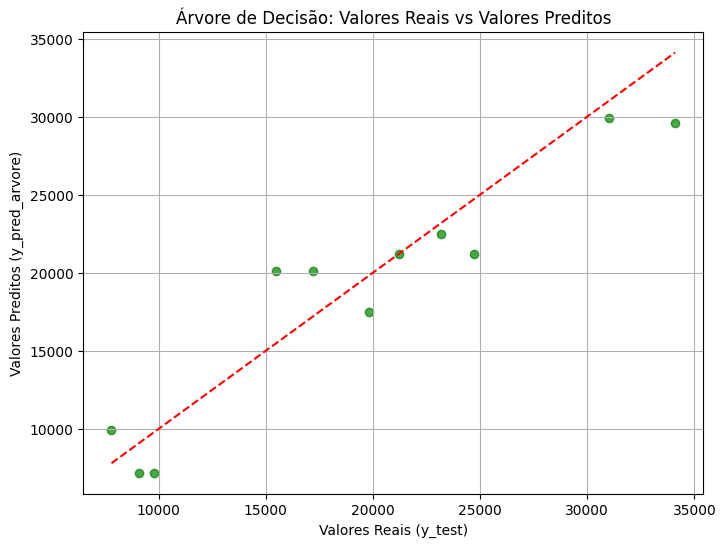

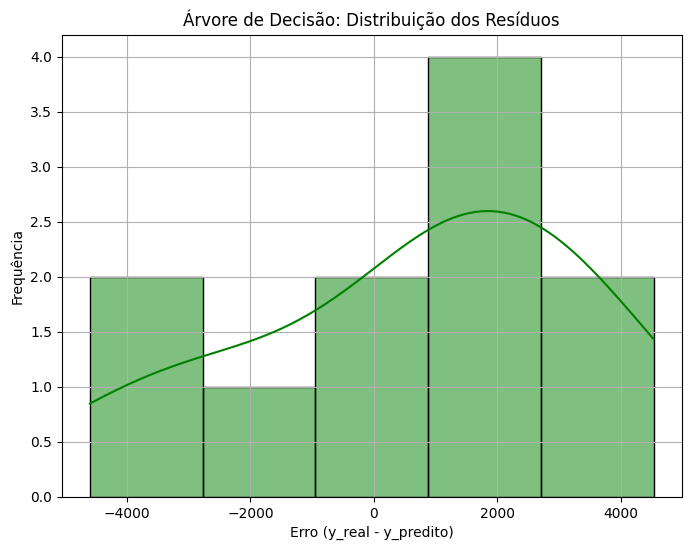

In [ ]:
# -----------------------
# MODELAGEM COM ÁRVORE DE DECISÃO
# -----------------------

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Criar o modelo de Árvore de Decisão para Regressão
modelo_arvore = DecisionTreeRegressor(random_state=42)

# Treinar o modelo com os dados de treino (sem outliers, de preferência)
modelo_arvore.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_arvore = modelo_arvore.predict(X_test)

# Avaliar o modelo
mse_arvore = mean_squared_error(y_test, y_pred_arvore)
r2_arvore = r2_score(y_test, y_pred_arvore)

# Mostrar resultados
print(f"Erro Quadrático Médio (MSE) - Árvore de Decisão: {mse_arvore:.2f}")
print(f"Coeficiente de Determinação (R²) - Árvore de Decisão: {r2_arvore:.2f}")

import matplotlib.pyplot as plt

# Gráfico Real vs Predito para Árvore de Decisão
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_arvore, alpha=0.7, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Valores Reais (y_test)')
plt.ylabel('Valores Preditos (y_pred_arvore)')
plt.title('Árvore de Decisão: Valores Reais vs Valores Preditos')
plt.grid(True)
plt.show()

# Gráfico da distribuição dos resíduos (erros)
residuos_arvore = y_test - y_pred_arvore

plt.figure(figsize=(8,6))
sns.histplot(residuos_arvore, kde=True, color='green')
plt.title('Árvore de Decisão: Distribuição dos Resíduos')
plt.xlabel('Erro (y_real - y_predito)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()



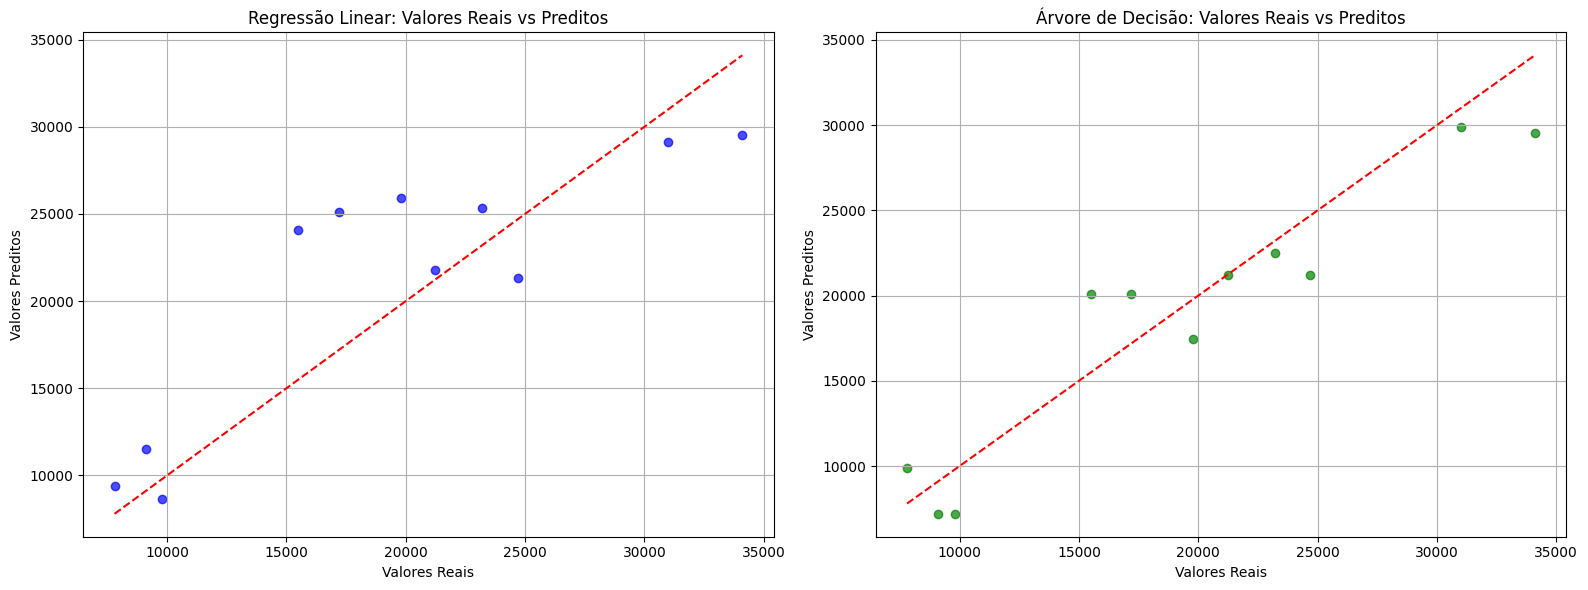

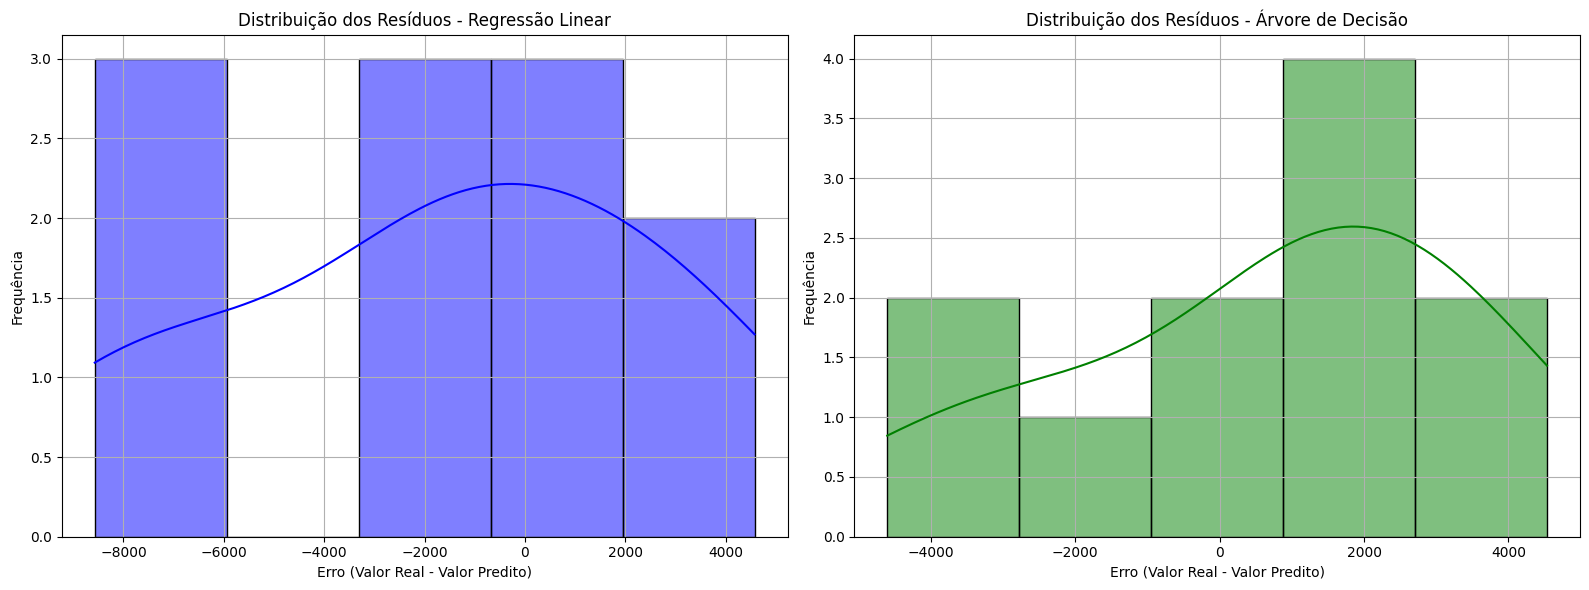

In [ ]:
import matplotlib.pyplot as plt

# Comparação Real vs Predito entre os dois modelos
fig, axes = plt.subplots(1, 2, figsize=(16,6))

# Gráfico 1: Regressão Linear
axes[0].scatter(y_test, y_pred, alpha=0.7, color='blue')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
axes[0].set_title('Regressão Linear: Valores Reais vs Preditos')
axes[0].set_xlabel('Valores Reais')
axes[0].set_ylabel('Valores Preditos')
axes[0].grid(True)

# Gráfico 2: Árvore de Decisão
axes[1].scatter(y_test, y_pred_arvore, alpha=0.7, color='green')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
axes[1].set_title('Árvore de Decisão: Valores Reais vs Preditos')
axes[1].set_xlabel('Valores Reais')
axes[1].set_ylabel('Valores Preditos')
axes[1].grid(True)

plt.tight_layout()
plt.show()

import seaborn as sns

# Comparação da Distribuição dos Resíduos

fig, axes = plt.subplots(1, 2, figsize=(16,6))

# Resíduos Regressão Linear
residuos_linear = y_test - y_pred
sns.histplot(residuos_linear, kde=True, color='blue', ax=axes[0])
axes[0].set_title('Distribuição dos Resíduos - Regressão Linear')
axes[0].set_xlabel('Erro (Valor Real - Valor Predito)')
axes[0].set_ylabel('Frequência')
axes[0].grid(True)

# Resíduos Árvore de Decisão
residuos_arvore = y_test - y_pred_arvore
sns.histplot(residuos_arvore, kde=True, color='green', ax=axes[1])
axes[1].set_title('Distribuição dos Resíduos - Árvore de Decisão')
axes[1].set_xlabel('Erro (Valor Real - Valor Predito)')
axes[1].set_ylabel('Frequência')
axes[1].grid(True)

plt.tight_layout()
plt.show()

